# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

In [2]:
print("MediaPipe version:", mp.__version__)
print("Tensor version:", tf.__version__)

MediaPipe version: 0.10.10
Tensor version: 2.10.0


# 2. Keypoints using MP Holistic

In [3]:
# Just turn on the webcam

cap = cv2.VideoCapture(2)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()
    
    # Show to screen
    cv2.imshow('OpenCV Feed', frame)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [3]:
# 1

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [4]:
# 2

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    
    return image, results

In [5]:
# 3: trying open webcam

cap = cv2.VideoCapture(2)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

- count
- face_landmarks
- index
- left_hand_landmarks
- mro
- pose_landmarks
- pose_world_landmarks
- right_hand_landmarks
- segmentation_mask

In [ ]:
    # Draw face connections
    # if results.face_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, 
    #         results.face_landmarks, 
    #         mp_holistic.FACEMESH_TESSELATION,
    #         landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
    #         # connection_drawing_spec=mp_drawing.DrawingSpec(color=(250,250,250), thickness=1, circle_radius=1)
    #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(250,250,250,0), thickness=1, circle_radius=1)
    #     )

# Draw pose connections
    # if results.pose_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, 
    #         results.pose_landmarks, 
    #         mp_holistic.POSE_CONNECTIONS,
    #         landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
    #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #     )

In [6]:
# 4: drawing all the landmark (face, pose, hands)

def draw_landmarks(image, results):
    # Draw hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [7]:
# 5

draw_landmarks(frame, results)

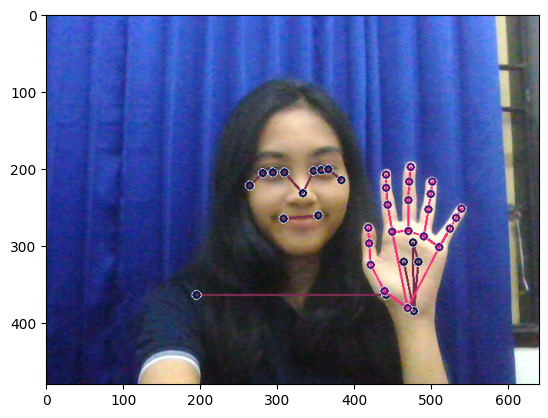

In [7]:
# 6

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
# 7:  open webcam + using landmark

cap = cv2.VideoCapture(2)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

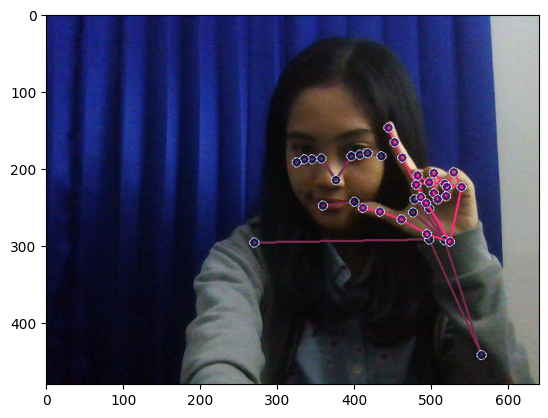

In [185]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
# 8: extracting all the landmark keypoints

def extract_keypoints(results):
    # pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
extract_keypoints(results).shape

(126,)

In [13]:
468*3 + 33*4 + 21*3 + 21*3

1662

# 4. Setup Folders for Collection

In [92]:
# 9: membuat folder dataset (dari 0 - selesai)

import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'DATASET'

# Path for exported images
IMAGE_DATA_PATH = 'DATASET_IMAGES'

# Actions that we try to detect
actions = np.array(['N']) 

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30

# Loop through each action to create directories for both data and images
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Instead of checking existing directories, we reset sequence numbering for each action
    for sequence in range(no_sequences):  # Starts from 0 and goes up to no_sequences - 1
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)

# Folder start
start_folder = 50

In [175]:
# 9: membuat folder dataset (dari 0 - mau berhenti di folder apa)

import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'DATASET'

# Path for exported images
IMAGE_DATA_PATH = 'DATASET_IMAGES'

# Actions that we try to detect
actions = np.array(['Y'])

# Define the range for sequence numbering
start_folder = 0
end_folder = 50

# Videos are going to be 30 frames in length
sequence_length = 30

# Loop through each action to create directories for both data and images
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Create directories starting from start_folder to end_folder - 1
    for sequence in range(start_folder, end_folder):
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)


# 5. Collect Keypoint Values for Training and Testing

In [176]:
# just rying to setup

cap = cv2.VideoCapture(2)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [182]:
# 10: Set base directories for keypoints and images (sesuain sama nama folder masing")

DATA_PATH = 'DATASET' 
IMAGE_DATA_PATH = 'DATASET_IMAGES'
actions = ['Y']
no_sequences = 20 # Number of sequences per action
sequence_length = 30 # Number of frames per sequence
start_sequence = 30 # Starting sequence number

In [183]:
# 10: membuat dataset

import cv2
import os
import numpy as np
import mediapipe as mp

# Inisialisasi webcam capture
cap = cv2.VideoCapture(2)

# Inisialisasi model MediaPipe Holistic dengan threshold kepercayaan
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # Terus menangkap frame hingga ditutup secara manual
        
        # Countdown sebelum pengambilan gambar dimulai
        for i in range(3, 0, -1):
            ret, frame = cap.read()
            cv2.putText(frame, f'Starting in {i}', (200, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            cv2.waitKey(1000)  # Tunggu selama 1 detik


        # Loop melalui tindakan
        for action in actions:
            # Loop melalui urutan
            for sequence in range(start_sequence, start_sequence + no_sequences):
                # Loop melalui frame dalam setiap urutan
                for frame_num in range(sequence_length):
                    # Baca frame dari feed webcam
                    ret, frame = cap.read()

                    # Lakukan deteksi menggunakan model Holistic
                    image, results = mediapipe_detection(frame, holistic)

                    # Gambar landmarks pada frame
                    draw_landmarks(image, results)

                    # Tampilkan pesan status
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING_COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                        
                        # Tampilkan ke layar
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(3000)  # Tunggu selama 3 detik

                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # Tampilkan frame dengan landmarks
                        cv2.imshow('OpenCV Feed', image)

                    # Ekstraksi keypoints dan simpan ke file NumPy array
                    keypoints = extract_keypoints(results)

                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Simpan gambar
                    img_path = os.path.join(IMAGE_DATA_PATH, action, str(sequence), f"{frame_num}.jpg")
                    cv2.imwrite(img_path, image)

                    # Break out of the loop if 'q' is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

                # Tampilkan pesan jeda sebelum mulai urutan video berikutnya
                if sequence < start_sequence + no_sequences - 1:
                    cv2.putText(image, 'WAITING 3 SECONDS', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)  # Tunggu selama 3 detik sebelum memulai urutan berikutnya

        # Lepaskan sumber daya webcam dan tutup jendela OpenCV
        cap.release()
        cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
ls

 Volume in drive C is Acer
 Volume Serial Number is DCE0-3687

 Directory of c:\Users\melli\Dropbox\PC\Downloads\sign-lang-capstone\training

01/06/2024  19:50    <DIR>          .
02/06/2024  18:18    <DIR>          ..
04/06/2024  20:40         2.036.635 action-recognation-updated.ipynb
               1 File(s)      2.036.635 bytes
               2 Dir(s)  65.056.047.104 bytes free


In [12]:
cd ..

c:\Users\melli\Dropbox\PC\Downloads\sign-lang-capstone


In [13]:
# di run waktu mau training aja

# Path for exported data, numpy arrays
DATA_PATH = 'DATASET'

# Actions that we try to detect
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
                    'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
sequence_length = 30

In [14]:
# 11: labelling

label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
np.array(sequences).shape

(1300, 30, 126)

In [18]:
np.array(labels).shape

(1300,)

In [20]:
# 12: load features di X

X = np.array(sequences)

In [21]:
X

array([[[ 7.74143934e-01,  8.68348420e-01, -1.62362497e-07, ...,
          4.06321526e-01,  8.05978596e-01, -6.15694374e-02],
        [ 7.91603327e-01,  8.38183999e-01, -2.85936750e-07, ...,
          3.89810950e-01,  7.72351742e-01, -5.99409044e-02],
        [ 7.94786632e-01,  8.39707673e-01, -3.07143239e-07, ...,
          3.91323626e-01,  7.73546278e-01, -6.32953197e-02],
        ...,
        [ 7.85644293e-01,  8.24853301e-01, -2.51343636e-07, ...,
          3.86180818e-01,  7.94256687e-01, -6.06148764e-02],
        [ 7.84820437e-01,  8.26089799e-01, -2.91044842e-07, ...,
          3.88058841e-01,  7.84588873e-01, -5.05016074e-02],
        [ 7.87760317e-01,  8.27406347e-01, -2.92817333e-07, ...,
          3.91314924e-01,  7.83343494e-01, -5.67743629e-02]],

       [[ 8.37192059e-01,  8.34615529e-01, -3.05168840e-07, ...,
          3.98124665e-01,  7.93978095e-01, -5.89909554e-02],
        [ 8.25295329e-01,  7.85320044e-01, -1.93429941e-07, ...,
          4.04730797e-01,  7.47968495e

In [22]:
X.shape

(1300, 30, 126)

In [23]:
# 13: load labels di y

y = to_categorical(labels).astype(int)

In [24]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [26]:
X_train.shape

(1235, 30, 126)

In [40]:
X_test.shape

(65, 30, 126)

In [41]:
y_train.shape

(1235, 26)

In [42]:
y_test.shape

(65, 26)

# 7. Build and Train LSTM Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [28]:
# Define the custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if (logs.get('accuracy') > 0.98) and (logs.get('val_accuracy') > 0.95):
            print("\nCategorical accuracy is higher than 0.91 and loss is lower than 0.19, stopping training!")
            self.model.stop_training = True

# Instantiate the custom callback
custom_callback = myCallback()

# Set up the TensorBoard callback
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Combine both callbacks
callbacks = [custom_callback, tb_callback]

In [75]:
# Arsitektur 1

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(512, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, RNN, GRU, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

# Arsitektur 2 (pake GRU)
# model = Sequential()
# model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(Dropout(.3))
# model.add(GRU(128, return_sequences=True, activation='relu'))
# model.add(Dropout(.3))
# model.add(GRU(64, return_sequences=False, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

# Arsitektur 3 (pake GRU)
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(actions.shape[0], activation='softmax'))

In [30]:
actions.shape[0]

26

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1200, callbacks=[callbacks])

Epoch 1/1200
39/39 [==============================] - 8s 58ms/step - loss: 4.1250 - accuracy: 0.0640 - val_loss: 3.8122 - val_accuracy: 0.1077
Epoch 2/1200
39/39 [==============================] - 2s 40ms/step - loss: 3.6317 - accuracy: 0.0818 - val_loss: 3.3638 - val_accuracy: 0.1077
Epoch 3/1200
39/39 [==============================] - 2s 38ms/step - loss: 3.2825 - accuracy: 0.0883 - val_loss: 3.0604 - val_accuracy: 0.0923
Epoch 4/1200
39/39 [==============================] - 2s 40ms/step - loss: 3.0522 - accuracy: 0.0923 - val_loss: 2.8698 - val_accuracy: 0.0615
Epoch 5/1200
39/39 [==============================] - 2s 44ms/step - loss: 2.8915 - accuracy: 0.1117 - val_loss: 2.7376 - val_accuracy: 0.1077
Epoch 6/1200
39/39 [==============================] - 2s 39ms/step - loss: 2.7329 - accuracy: 0.1555 - val_loss: 2.5782 - val_accuracy: 0.2308
Epoch 7/1200
39/39 [==============================] - 2s 45ms/step - loss: 2.6572 - accuracy: 0.1587 - val_loss: 2.4728 - val_accuracy: 0.1692

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           98304     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

# 8. Make Predictions

In [33]:
res = model.predict(X_test)

3/3 [==============================] - 1s 9ms/step


In [34]:
actions[np.argmax(res[4])]

'B'

In [35]:
actions[np.argmax(y_test[4])]

'B'

# 9. Save Weights

In [52]:
# Save the model to the SavedModel format
export_dir = 'saved_model/26abjad_gru_verfinal'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/26abjad_gru_verfinal\assets


In [53]:
import pathlib
import os

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
]
converter._experimental_lower_tensor_list_ops = False

# Perform the conversion
try:
    tflite_model = converter.convert()
    # Save the converted model
    tflite_model_file = pathlib.Path('model_26abjad_gru_99accval_fin.tflite')
    tflite_model_file.write_bytes(tflite_model)
    print("Model converted successfully and saved as 'modelCoba.tflite'.")
except Exception as e:
    print(f"Conversion failed: {e}")

Model converted successfully and saved as 'modelCoba.tflite'.


In [211]:
converter.target_spec.supported_ops

[<OpsSet.TFLITE_BUILTINS: 'TFLITE_BUILTINS'>,
 <OpsSet.SELECT_TF_OPS: 'SELECT_TF_OPS'>]

In [36]:
model.save('model_26abjad_gru.h5')

In [ ]:
del model

In [37]:
model.load_weights('model_26abjad_gru.h5')

In [40]:
import cv2
import numpy as np
import mediapipe as mp
import time

# Initialize variables
sequence = []
sentence = []
predictions = []
threshold = 0.95
state = 'countdown'
countdown_time = 3
display_time = 2
start_time = time.time()

cap = cv2.VideoCapture(2)
mp_holistic = mp.solutions.holistic

# Helper function to show countdown
def show_countdown(image, seconds_left):
    cv2.putText(image, f'Memulai prediksi dalam {seconds_left}..', (100, 250), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame
        ret, frame = cap.read()

        current_time = time.time()
        
        if state == 'countdown':
            seconds_left = countdown_time - int(current_time - start_time)
            image = frame.copy()
            show_countdown(image, seconds_left)
            
            if seconds_left <= 0:
                state = 'collecting'
                start_time = current_time
                sequence = []
        
        elif state == 'collecting':
            # Perform detection
            image, results = mediapipe_detection(frame, holistic)
            draw_landmarks(image, results)
            
            # Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]

                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
                
                # Update sentence based on prediction
                if np.unique(predictions[-28:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                
                if len(sentence) > 5:
                    sentence = sentence[-5:]

                state = 'displaying'
                start_time = current_time
        
        elif state == 'displaying':
            # Display the prediction
            if len(sentence) > 0:
                cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            if (current_time - start_time) > display_time:
                state = 'countdown'
                start_time = current_time

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 27ms/step
V
1/1 [==============================] - 0s 22ms/step
A
1/1 [==============================] - 0s 23ms/step
S
1/1 [==============================] - 0s 22ms/step
L


# 10. Evaluation using Confusion Matrix and Accuracy

3/3 [==============================] - 0s 18ms/step


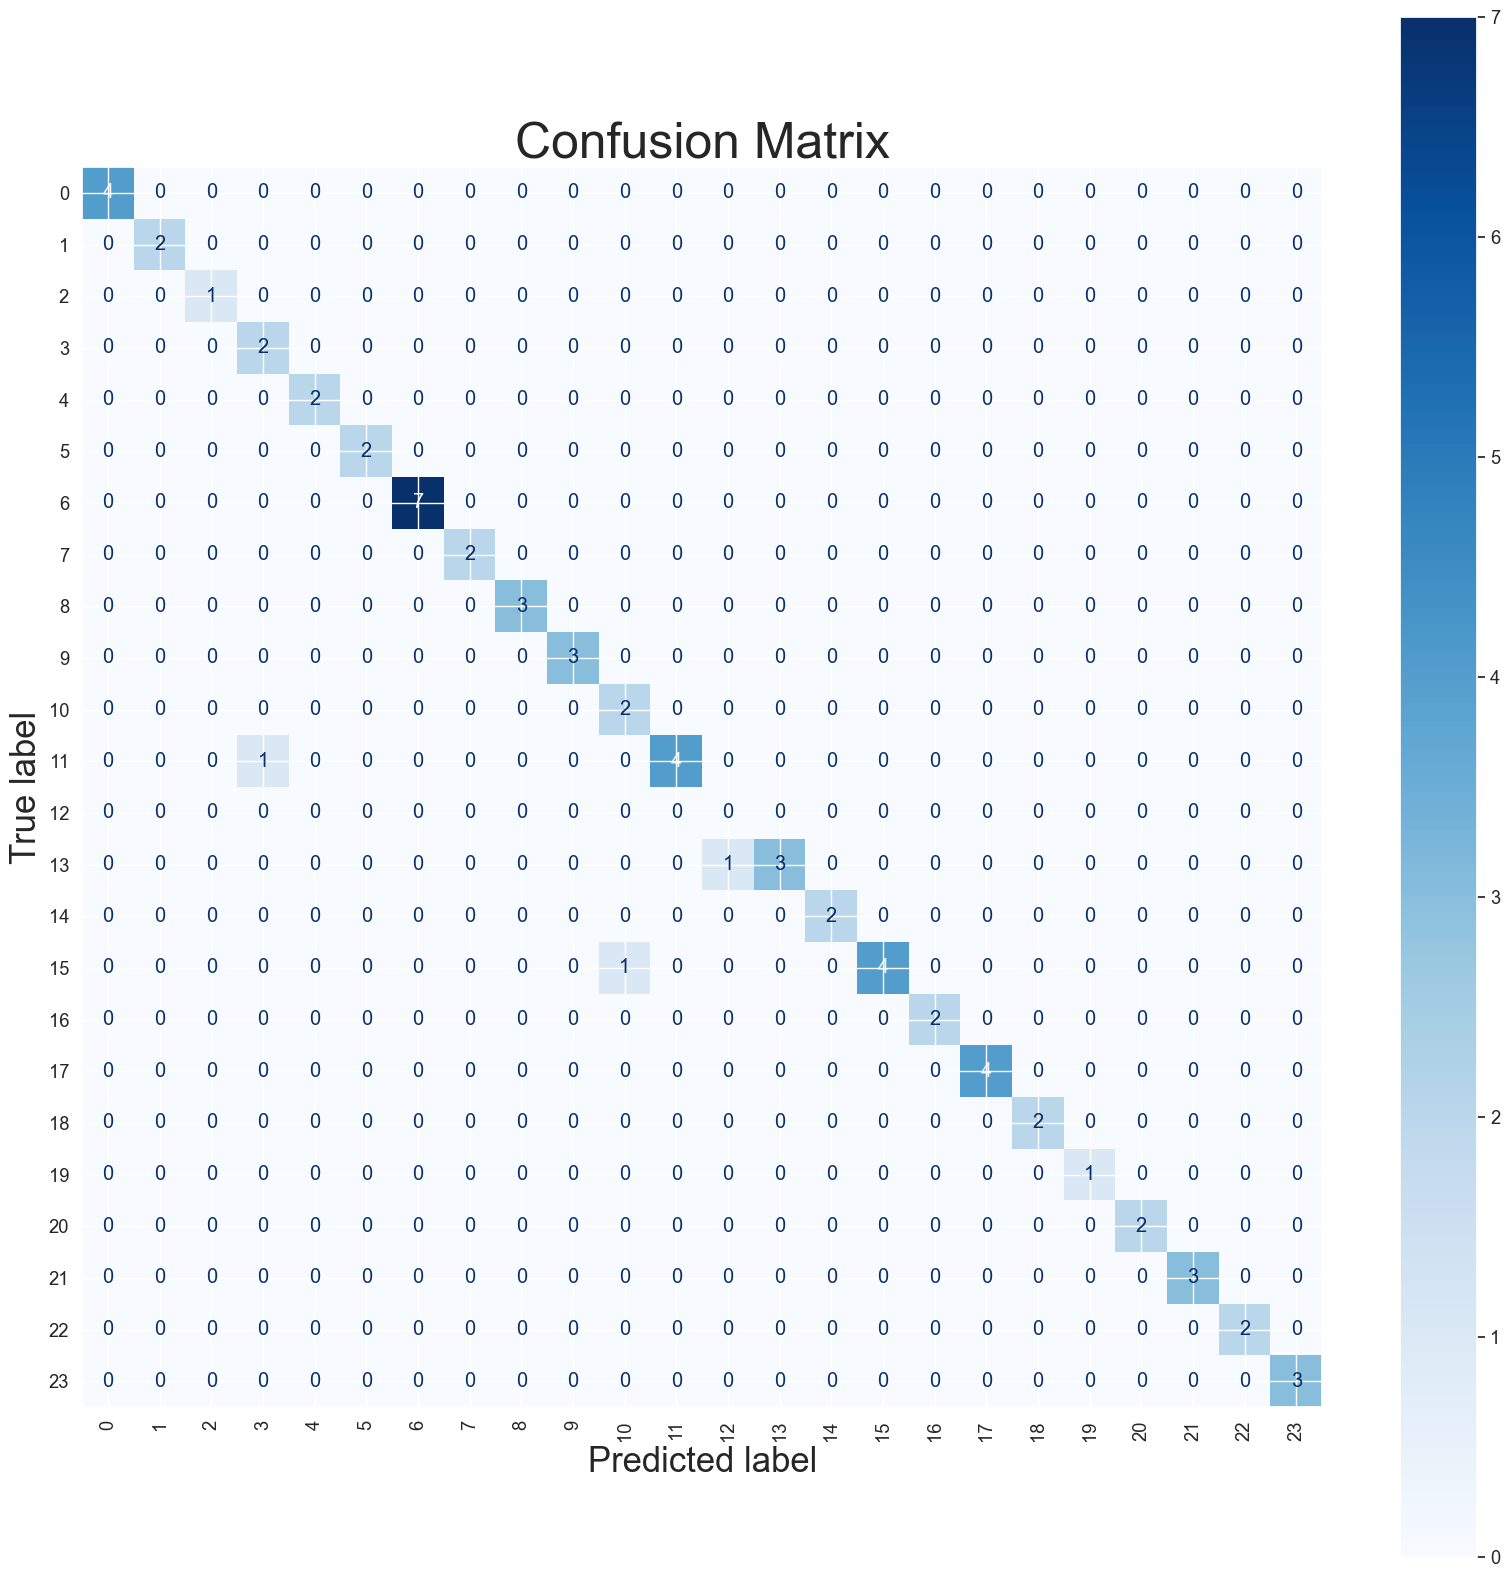

In [72]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fungsi untuk mengubah angka menjadi huruf
def number_to_letter(number):
    if number < 24:
        return chr(ord('a') + number)
    else:
        return chr(ord('A') + number - 26)

# Mengasumsikan model Anda sudah dilatih dengan model.fit()

# Langkah 1: Prediksi label untuk data uji
y_pred_prob = model.predict(X_test)

# Langkah 2: Konversi prediksi probabilitas menjadi label kelas
# Jika menggunakan softmax, ambil argmax untuk mendapatkan label kelas prediksi
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # Konversi one-hot encoded labels ke label kelas

# Mengubah label angka menjadi huruf
y_pred_letters = [number_to_letter(label) for label in y_pred]
y_true_letters = [number_to_letter(label) for label in y_true]

# Langkah 3: Hitung confusion matrix
cm = confusion_matrix(y_true_letters, y_pred_letters)

# Langkah 4: Tampilkan confusion matrix menggunakan matplotlib
fig, ax = plt.subplots(figsize=(20, 20))  # Atur ukuran gambar
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')

# Menambahkan label dan judul
ax.set_title("Confusion Matrix", fontsize=36)
ax.set_xlabel("Predicted label", fontsize=25)
ax.set_ylabel("True label", fontsize=25)
plt.show()


In [61]:
actions_lab = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
                    'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [212]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(X_test)

3/3 [==============================] - 0s 12ms/step


In [56]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [120]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[63,  0],
        [ 0,  2]],

       [[64,  0],
        [ 0,  1]],

       [[60,  0],
        [ 0,  5]],

       [[63,  0],
        [ 0,  2]],

       [[63,  0],
        [ 0,  2]],

       [[61,  0],
        [ 0,  4]],

       [[63,  0],
        [ 0,  2]],

       [[63,  0],
        [ 0,  2]],

       [[62,  0],
        [ 0,  3]],

       [[61,  0],
        [ 0,  4]],

       [[63,  0],
        [ 0,  2]],

       [[62,  0],
        [ 0,  3]],

       [[64,  0],
        [ 0,  1]],

       [[62,  0],
        [ 0,  3]],

       [[59,  0],
        [ 0,  6]],

       [[62,  0],
        [ 0,  3]],

       [[63,  0],
        [ 0,  2]],

       [[62,  0],
        [ 0,  3]],

       [[63,  0],
        [ 0,  2]],

       [[63,  0],
        [ 0,  2]],

       [[63,  0],
        [ 0,  2]],

       [[62,  0],
        [ 0,  3]],

       [[62,  0],
        [ 0,  3]],

       [[62,  0],
        [ 0,  3]]], dtype=int64)

In [121]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [38]:
from scipy import stats

In [39]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [68]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(2)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)

        cv2.putText(image, ' '.join(sentence), (3,30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import time

# Initialize variables
sequence = []
sentence = []
predictions = []
threshold = 0.95
state = 'countdown'
countdown_time = 3
display_time = 2
start_time = time.time()

cap = cv2.VideoCapture(2)
mp_holistic = mp.solutions.holistic

# Helper function to show countdown
def show_countdown(image, seconds_left):
    cv2.putText(image, f'Memulai prediksi dalam {seconds_left}..', (100, 250), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame
        ret, frame = cap.read()

        current_time = time.time()
        
        if state == 'countdown':
            seconds_left = countdown_time - int(current_time - start_time)
            image = frame.copy()
            show_countdown(image, seconds_left)
            
            if seconds_left <= 0:
                state = 'collecting'
                start_time = current_time
                sequence = []
        
        elif state == 'collecting':
            # Perform detection
            image, results = mediapipe_detection(frame, holistic)
            draw_landmarks(image, results)
            
            # Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]

                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
                
                # Update sentence based on prediction
                if np.unique(predictions[-28:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                
                if len(sentence) > 5:
                    sentence = sentence[-5:]

                state = 'displaying'
                start_time = current_time
        
        elif state == 'displaying':
            # Display the prediction
            if len(sentence) > 0:
                cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            if (current_time - start_time) > display_time:
                state = 'countdown'
                start_time = current_time

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()